In [1]:
# Dependencies
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [3]:
# Wine Spectator tasters review wines on the following 100-point scale:

# 95-100 Classic: a great wine
# 90-94 Outstanding: a wine of superior character and style
# 85-89 Very good: a wine with special qualities
# 80-84 Good: a solid, well-made wine
# 75-79 Mediocre: a drinkable wine that may have minor flaws
# 50-74 Not recommended

# https://www.winespectator.com/articles/scoring-scale#:~:text=Finished%20wines%2C%20reviewed%20from%20bottle,tasting%20of%20an%20unfinished%20wine.&text=For%20example%2C%20one%20wine%20may,90%2C%20another%2089%2D92.

In [4]:
# Read data
weather = pd.read_csv('Resources/dataLargerSet-Copy1.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [5]:
weatherClean=weather.drop(["Unnamed: 0", "index"], axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [6]:
# Data Pre-Processing

In [7]:
weatherClean.columns


Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [29]:
X= weatherClean.drop(['winery', 'vintage', 'points', 'cities'], axis=1)
y= weatherClean['points'].tolist()
##y= weatherClean['points'].values
# print(X.shape, y)
# print(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

MinMaxScaler()

In [32]:


# df = pd.DataFrame({'Activity': y_train})
# y_temp2 = df['Activity'].values.reshape(-1,1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(x)
# df['Activity'] = x_scaled

##df = pd.DataFrame({'Activity': y_train})
##y_temp3 = df['Activity'].values.reshape(-1,1) #returns a numpy array
##min_max_scaler = preprocessing.MinMaxScaler()

# y_train=y_train.reshape(-1, 1)
# y_test=y_test.reshape(-1, 1)

# y_temp2= []
# for y_temp in y_train:
#     y_temp1 = []
#     y_temp1.append(y_temp)
#     y_temp2.append(y_temp1)
# y_train = y_temp2

# y_temp2= []
# for y_temp in y_test:
#     y_temp1 = []
#     y_temp1.append(y_temp)
#     y_temp2.append(y_temp1)
# y_test = y_temp2

y_scaler = MinMaxScaler().fit(np.ravel(y,order='c'))

y_train_scaled = y_scaler.transform(y_temp2)
y_test_scaled = y_scaler.transform(y_temp2)

# y_train_scaled
# y_test_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[88. 87. 94. ... 90. 89. 85.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
# Create Deep Learning Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
# Create model and add layers****************************
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=X.shape[1]))
##model.add(Dense(units=200, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [15]:
# Compile and fit the model
# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=['sparse_top_k_categorical_accuracy'])
# Epoch 200/200
# 32/32 - 0s - loss: 0.0233 - sparse_top_k_categorical_accuracy: 0.9980

In [16]:
# # Compile and fit the model
# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=['top_k_categorical_accuracy'])
# Epoch 200/200
# 32/32 - 0s - loss: 0.0225 - top_k_categorical_accuracy: 1.0000

In [39]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [40]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               7400      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 33,060
Trainable params: 33,060
Non-trainable params: 0
_________________________________________________________________


In [41]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)

(996, 36)
(996, 1)


In [43]:
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 2/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 3/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 4/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 5/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 6/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 7/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 8/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 9/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 10/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 11/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 12/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 13/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 14/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 15/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 16/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 17/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 18/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Epoch 19/100
32/32 - 0s - loss: 0.1694 - mse: 0.1694
Ep

In [21]:
# history.history

In [22]:
# # Quantify our Trained Model
# model_loss, model_accuracy = model.evaluate(
#     X_test_scaled, y_test_categorical, verbose=2)
# print(
#     f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [47]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'{model_loss},{ model_accuracy}')

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [45]:
# Make Predictions
encoded_predictions = model.predict_classes(X_test_scaled)
# y_predictions = y_scaler.inverse_transform(encoded_predictions)
y_predictions = y_scaler

C:\Users\katty\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
print(f"Predicted classes: {y_predictions[:5]}")
print(f"Actual Labels: {list(y_test[:5])}")

TypeError: 'MinMaxScaler' object is not subscriptable

In [25]:
from numpy import mean, absolute 

# mean(absolute(weatherClean["y_test"] - weatherClean["y_predictions"]))


from sklearn.metrics import accuracy_score
accuracy_score(y_test[:5], y_predictions[:5], normalize=False)

0

In [26]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predictions), 2))
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec21/computing-regression-accuracy

Mean absolute error = 8.68
Mean squared error = 83.13
Median absolute error = 8.0
Explain variance score = -5.35
R2 score = -9.05


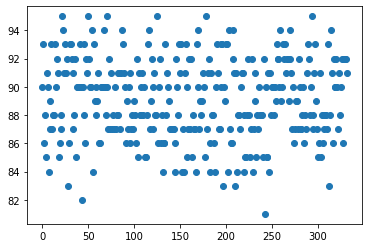

In [27]:
import matplotlib.pyplot as plt
xx=[z for z in range(0,len(y_test))]
plt.scatter(xx,y_test)
plt.show()

In [28]:
# print(y_test)

In [29]:
dfAccur=pd.DataFrame( )
dfAccur["y_test"]= y_test
dfAccur["y_predictions"]= y_predictions
dfAccur.head(100)

,y_test,y_predictions
0,90,99.0
1,93,99.0
2,86,80.0
3,88,99.0
4,85,80.0
...,...,...
95,86,80.0
96,91,99.0
97,87,80.0
98,88,80.0
